<a href="https://colab.research.google.com/github/Vanitha2191/social-media-addiction-project/blob/main/EDA_SocialMedia_Addiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn


In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Students Social Media Addiction.csv']))
print(df.head())


Saving Students Social Media Addiction.csv to Students Social Media Addiction.csv
   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes        

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Students Social Media Addiction.csv")

# Display first few rows
print(df.head())

# Check dataset info
print(df.info())

# Summary statistics
print(df.describe(include='all'))


   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Soc

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print("Duplicates:", df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()


Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64
Duplicates: 0


In [ ]:
# Gender distribution
print(df['Gender'].value_counts())

# Mean addiction level by gender
print(df.groupby("Gender")["Addicted_Score"].mean())

# Correlation between time spent and addiction level
print(df[['Avg_Daily_Usage_Hours', 'Addicted_Score']].corr())

# NumPy: Calculate average addiction level
addiction_array = df['Addicted_Score'].to_numpy()
print("Mean addiction level (NumPy):", np.mean(addiction_array))

Gender
Female    353
Male      352
Name: count, dtype: int64
Gender
Female    6.515581
Male      6.357955
Name: Addicted_Score, dtype: float64
                       Avg_Daily_Usage_Hours  Addicted_Score
Avg_Daily_Usage_Hours                  1.000           0.832
Addicted_Score                         0.832           1.000
Mean addiction level (NumPy): 6.436879432624114


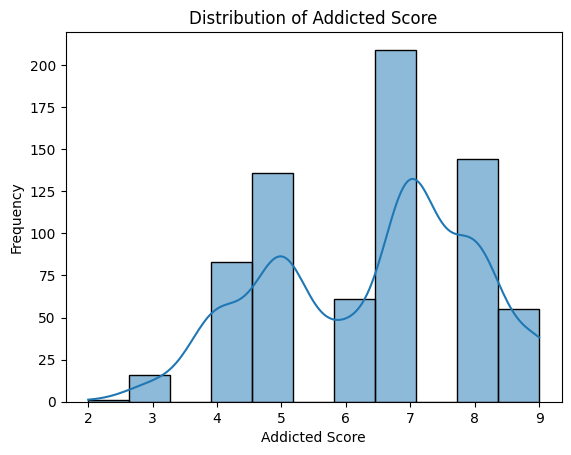

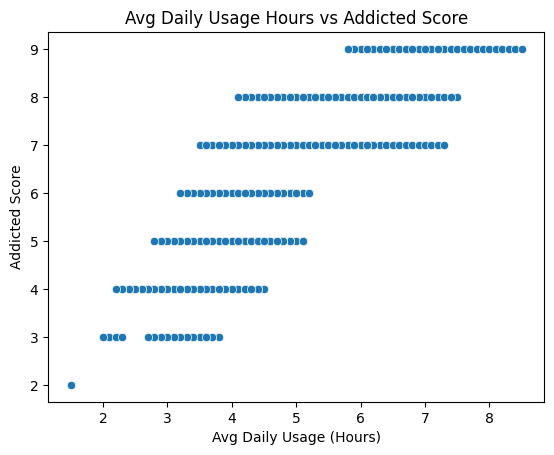

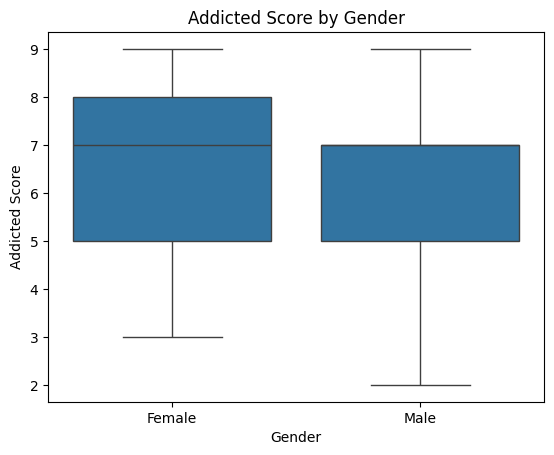

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Addicted Score
sns.histplot(df['Addicted_Score'], kde=True)
plt.title("Distribution of Addicted Score")
plt.xlabel("Addicted Score")
plt.ylabel("Frequency")
plt.show()

# Avg Daily Usage vs Addicted Score
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Addicted_Score', data=df)
plt.title("Avg Daily Usage Hours vs Addicted Score")
plt.xlabel("Avg Daily Usage (Hours)")
plt.ylabel("Addicted Score")
plt.show()

# Addicted Score by Gender
sns.boxplot(x='Gender', y='Addicted_Score', data=df)
plt.title("Addicted Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Addicted Score")
plt.show()


In [ ]:
avg_score = df['Addicted_Score'].mean()
print(f"Average Addicted Score: {avg_score:.2f}")


Average Addicted Score: 6.44


In [ ]:
correlation = df[['Avg_Daily_Usage_Hours', 'Addicted_Score']].corr()
print("Correlation Matrix:\n", correlation)


Correlation Matrix:
                        Avg_Daily_Usage_Hours  Addicted_Score
Avg_Daily_Usage_Hours                  1.000           0.832
Addicted_Score                         0.832           1.000


In [ ]:
gender_avg = df.groupby('Gender')['Addicted_Score'].mean()
print("Average Addicted Score by Gender:\n", gender_avg)


Average Addicted Score by Gender:
 Gender
Female    6.515581
Male      6.357955
Name: Addicted_Score, dtype: float64


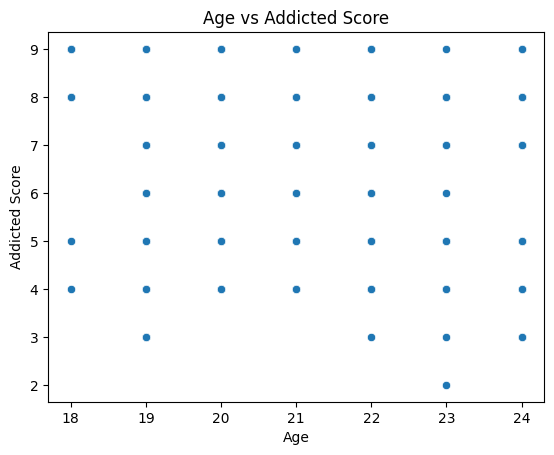

In [ ]:
if 'Age' in df.columns:
    sns.scatterplot(x='Age', y='Addicted_Score', data=df)
    plt.title("Age vs Addicted Score")
    plt.xlabel("Age")
    plt.ylabel("Addicted Score")
    plt.show()


In [ ]:
# Save analysis to Excel
df.to_excel("social_media_analysis.xlsx", index=False)

# Download in Colab
from google.colab import files
files.download("social_media_analysis.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install plotly

import plotly.express as px

fig = px.scatter(df, x='Avg_Daily_Usage_Hours', y='Addicted_Score', color='Gender',
                 title='Daily Usage vs Addiction Score by Gender')
fig.show()
